# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [3]:
cities[0:3]

['butaritari', 'arraial do cabo', 'iqaluit']

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [4]:
cities_data = {'name':[], 'longitude':[] ,'latitude':[] ,'temp_min':[] , 'temp_max': [], 'humidity': [], 'wind':[] , 'cloudiness':[], 'sunrise':[], 'sunset':[]}
not_found = []

for city in cities:
    base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key
    
    try:
        req = requests.get(base_url + f'&q={city}')
        data = req.json()
        name = data['name']
        longitude = data['coord']['lon']
        latitude = data['coord']['lat']
        temp_min = data['main']['temp_min']
        temp_max = data['main']['temp_max']
        humidity = data['main']['humidity']
        wind = data['wind']['speed']
        cloudiness = data['clouds']['all']
        sunrise = data['sys']['sunrise']
        sunset = data['sys']['sunset']
        
        to_append = {'name': name, 'longitude': longitude, 'latitude': latitude, 'temp_min': temp_min, 'temp_max': temp_max, 'humidity': humidity, 'wind': wind, 'cloudiness': cloudiness, 'sunrise': sunrise, 'sunset': sunset}
        
        for key, value in to_append.items():
            cities_data[key].append(value)
    
    except:
        not_found.append(city)
        #print(city + ' not found')
        pass
print(len(not_found))

52


### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [5]:
df = pd.DataFrame(cities_data)
print(df.head())

              name  longitude  latitude  temp_min  temp_max  humidity   wind  \
0       Butaritari   172.7902    3.0707     81.23     81.23        76  11.59   
1  Arraial do Cabo   -42.0278  -22.9661     62.56     62.56       100   3.44   
2          Iqaluit   -68.5145   63.7506     31.69     31.73        80   5.99   
3            Kapaa  -159.3190   22.0752     80.92     84.18        65   1.99   
4        Cape Town    18.4232  -33.9258     60.35     62.11        71   1.01   

   cloudiness     sunrise      sunset  
0          23  1634753537  1634796867  
1          75  1634717465  1634763259  
2          90  1634729913  1634763523  
3           1  1634747731  1634789287  
4           0  1634788639  1634835853  


In [6]:
df.to_csv('cities_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

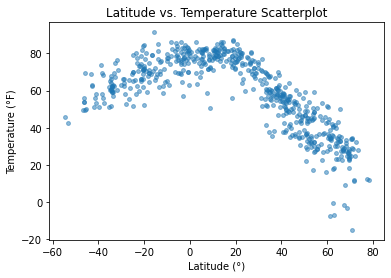

In [7]:
plt.scatter(df['latitude'], df['temp_min'], s = 15, alpha = 0.5)
plt.title('Latitude vs. Temperature Scatterplot')
plt.xlabel('Latitude (°)')
plt.ylabel('Temperature (°F)')
plt.savefig('Latitude_Temperature.png')

plt.show()

#### Latitude vs. Humidity Plot

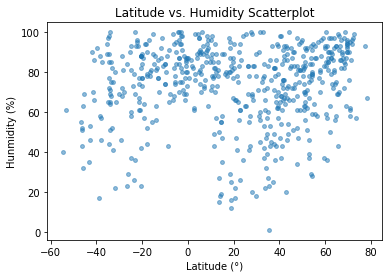

In [8]:
plt.scatter(df['latitude'], df['humidity'], s = 15, alpha = 0.5)
plt.title('Latitude vs. Humidity Scatterplot')
plt.xlabel('Latitude (°)')
plt.ylabel('Hunmidity (%)')
plt.savefig('Latitude_Humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

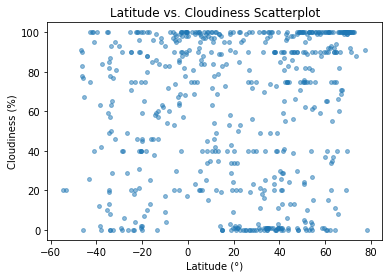

In [9]:
plt.scatter(df['latitude'], df['cloudiness'], s = 15, alpha = 0.5)
plt.title('Latitude vs. Cloudiness Scatterplot')
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness (%)')
plt.savefig('Latitude_Cloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

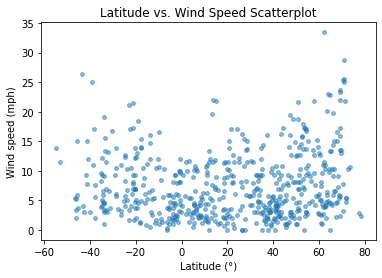

In [10]:
plt.scatter(df['latitude'], df['wind'], s = 15, alpha = 0.5)
plt.title('Latitude vs. Wind Speed Scatterplot')
plt.xlabel('Latitude (°)')
plt.ylabel('Wind speed (mph)')
plt.savefig('Latitude_Wind.png')

plt.show()

#### Temperature vs. Cloudiness

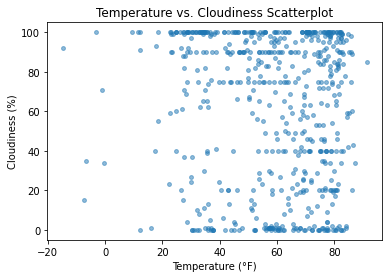

In [11]:
plt.scatter(df['temp_min'], df['cloudiness'], s = 15, alpha = 0.5)
plt.title('Temperature vs. Cloudiness Scatterplot')
plt.xlabel('Temperature (°F)')
plt.ylabel('Cloudiness (%)')
plt.savefig('Temperature_Cloudiness.png')

plt.show()

#### Wind vs. Cloudiness

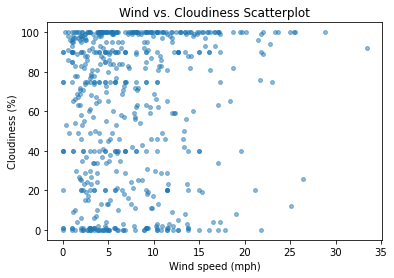

In [12]:
plt.scatter(df['wind'], df['cloudiness'], s = 15, alpha = 0.5)
plt.title('Wind vs. Cloudiness Scatterplot')
plt.xlabel('Wind speed (mph)')
plt.ylabel('Cloudiness (%)')
plt.savefig('Wind_Cloudiness.png')

plt.show()

#### Latitude vs. Sunrise

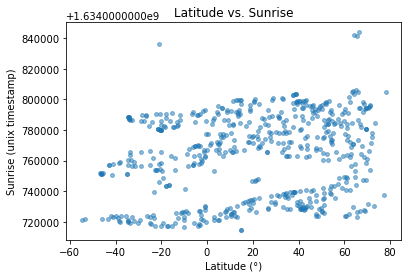

In [13]:
plt.scatter(df['latitude'], df['sunrise'], s = 15, alpha = 0.5)
plt.title('Latitude vs. Sunrise')
plt.xlabel('Latitude (°)')
plt.ylabel('Sunrise (unix timestamp)')
plt.show()

#the time units here are not local time, else this would look very different, something like a moon crescent

#### Longitude vs. Sunrise

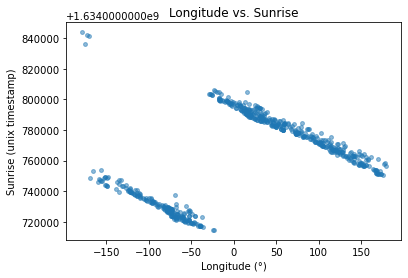

In [14]:
plt.scatter(df['longitude'], df['sunrise'], s = 15, alpha = 0.5)
plt.title('Longitude vs. Sunrise')
plt.xlabel('Longitude (°)')
plt.ylabel('Sunrise (unix timestamp)')
plt.show()

#sure enough "eppur si mouve!"

#### Find Local Time

In [15]:
import datetime
from timezonefinder import TimezoneFinder
import pytz

df_time = df.copy(deep = True).drop(columns = ['temp_min', 'temp_max', 'humidity',
       'wind', 'cloudiness']).set_index('name')

#df_time['time_zone'] = df_time.apply(lambda row: TimezoneFinder().timezone_at(lng = df_time.loc[i , 'longitude'] , lat = df_time.loc[i , 'latitude']))
# well, this did not work, give no error code, only NAN

time_zone = {}
for i, row in df_time.iterrows():
    try:
        timezone = TimezoneFinder().timezone_at(lng = row['longitude'] , lat = row['latitude'])
        time_zone[i] = timezone
        
    except:
        time_zone[i] = 'NAN'
        pass

#df_time_zone = pd.DataFrame(use)
#this raises an exception... so for the moment maybe I abandon this project

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

#### Latitude vs. Temperature Plot

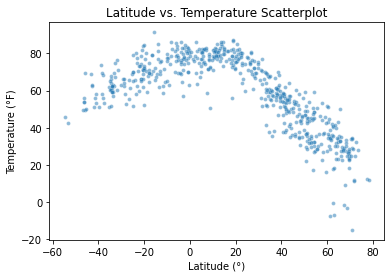

In [16]:
import seaborn as sns

g = sns.scatterplot(x = 'latitude' , y = 'temp_min', data = df, alpha = 0.5, s = 15)
g.set_title('Latitude vs. Temperature Scatterplot')
g.set(xlabel = 'Latitude (°)', ylabel = 'Temperature (°F)')
plt.show()

#### Latitude vs. Wind Speed Plot

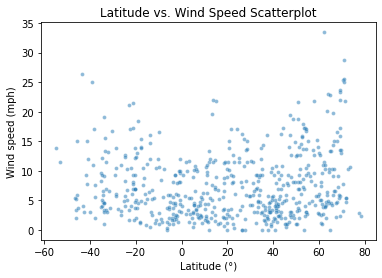

In [17]:
g = sns.scatterplot(x = 'latitude', y = 'wind', data = df,  s = 15, alpha = 0.5)
g.set_title('Latitude vs. Wind Speed Scatterplot')
g.set(xlabel = 'Latitude (°)', ylabel = 'Wind speed (mph)' )
plt.show()

#### Temperature vs. Cloudiness

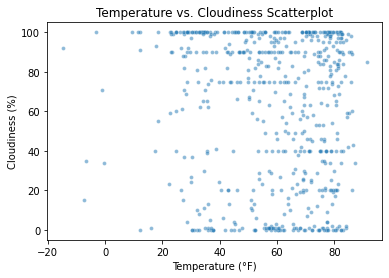

In [18]:
g = sns.scatterplot(x = 'temp_min', y = 'cloudiness', data = df, s = 15, alpha = 0.5)
g.set_title('Temperature vs. Cloudiness Scatterplot')
g.set(xlabel = 'Temperature (°F)', ylabel = 'Cloudiness (%)')
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

1, temperatures tend to get lower as we distance ourselves from the equator to both direction, but more so on the nothern hemisphere

2, at an around the equator low humidity is rare and tends to be at least 30% or more
3, as we distance ourselves from the equator higher wind outliers are more frequent (this might not be a trend, due to low number of outliers: might need to repeat this for 100 or 1000 days to get a picture)

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

In [49]:
# first create a dictionary with pandas DataFrame of some of the parameters of 5day/3h forecast of a few cities

cities_list = ['Boston', 'Los Angeles', 'San Francisco', 'St. Louis']
d = {}
        
for city in cities_list:
    try:
        req = requests.get('http://api.openweathermap.org/data/2.5/forecast?q=' + f'{city}' + '&appid=' + api_key)
        data = req.json()
        
        name = data['city']['name'] #having the name here might seem redundant, but will come handy when creating one big dataframe at the end
        time_series = {'name': [],'current_time': [], 'temp_min': [], 'humidity': [], 'wind': [], 'cloudiness' : []}
        
        for i in range (len(data['list']) - 1):
            try:
                current_time = data['list'][i]['dt']
                temp_min = data['list'][i]['main']['temp_min']
                humidity = data['list'][i]['main']['humidity']
                wind = data['list'][i]['wind']['speed']
                cloudiness = data['list'][i]['clouds']['all']
                
                ts_to_append = {'name': name, 'current_time' : current_time, 'temp_min': temp_min, 'humidity' : humidity, 'wind': wind, 'cloudiness': cloudiness}
                #when I try to do this with a list of the values only, it raises an exception
                for key, value in ts_to_append.items():
                    time_series[key].append(value)
            
            except:
                print('data not found for: ' + city + i +' list parameter')
          
        d[city] = pd.DataFrame(time_series)
        
    except:
        print(city + ' not found')

In [67]:
#will extract these DataFrames manually as I am not sure how to automatize the naming (else would have done in the previous step)

Boston = d['Boston']
LA = d['Los Angeles']
SF = d['San Francisco']
SL = d['St. Louis']

# convert the timestamps to elapsed time from the first entry in hours and add them as a new column to the dataframe, also adding acolumn which contains only 
for df in [Boston, LA, SF, SL]:
    df['hours'] = (df['current_time'] - df.iloc[0,1])/3600


final = Boston.merge(LA, 'outer').merge(SF, 'outer').merge(SL, 'outer')

final.head(2)

,name,current_time,temp_min,humidity,wind,cloudiness,hours
0,Boston,1634785200,287.43,82,2.97,35,0.0
1,Boston,1634796000,288.24,77,3.39,53,3.0


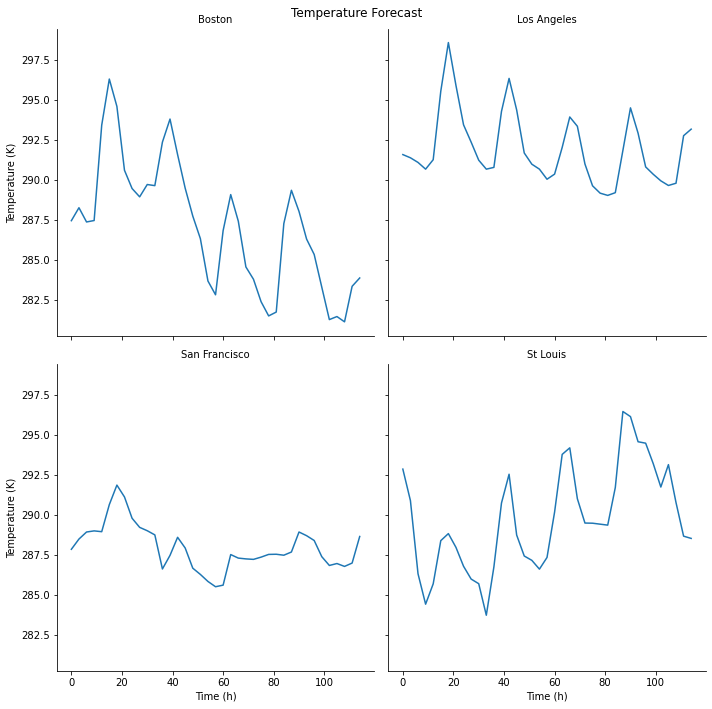

In [86]:
# time to have fun
rel = sns.relplot(x = 'hours', y = 'temp_min', data = final, col = 'name', kind = 'line', markers = True, col_wrap = 2)

rel.fig.subplots_adjust(top = 0.95)
rel.fig.suptitle('Temperature Forecast')
rel.set_titles('{col_name}')
rel.set(xlabel = 'Time (h)', ylabel = 'Temperature (K)')

plt.savefig('Temperature_forecast.png')
plt.show()

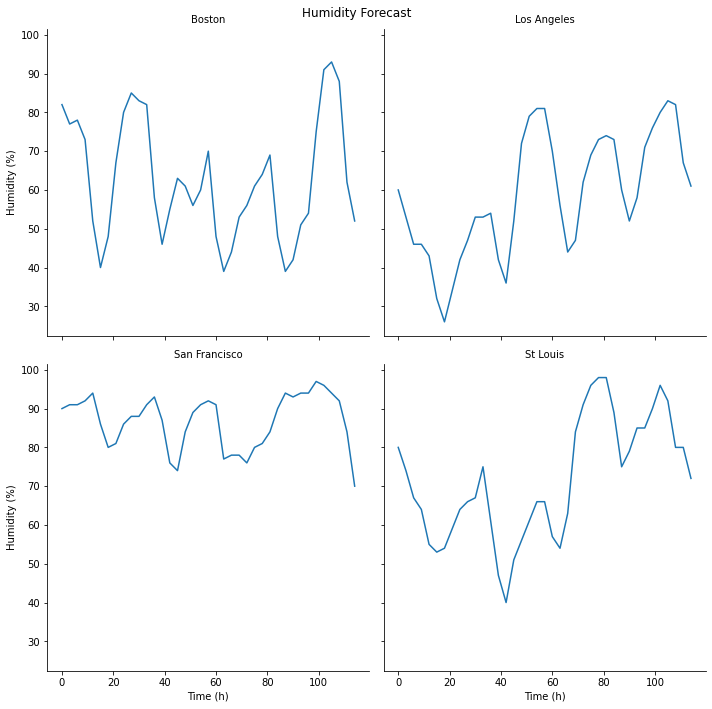

In [87]:
rel = sns.relplot(x = 'hours', y = 'humidity', data = final, col = 'name', kind = 'line', markers = True, col_wrap = 2)

rel.fig.subplots_adjust(top = 0.95)
rel.fig.suptitle('Humidity Forecast')
rel.set_titles('{col_name}')
rel.set(xlabel = 'Time (h)', ylabel = 'Humidity (%)')

plt.savefig('Humidity_forecast.png')
plt.show()

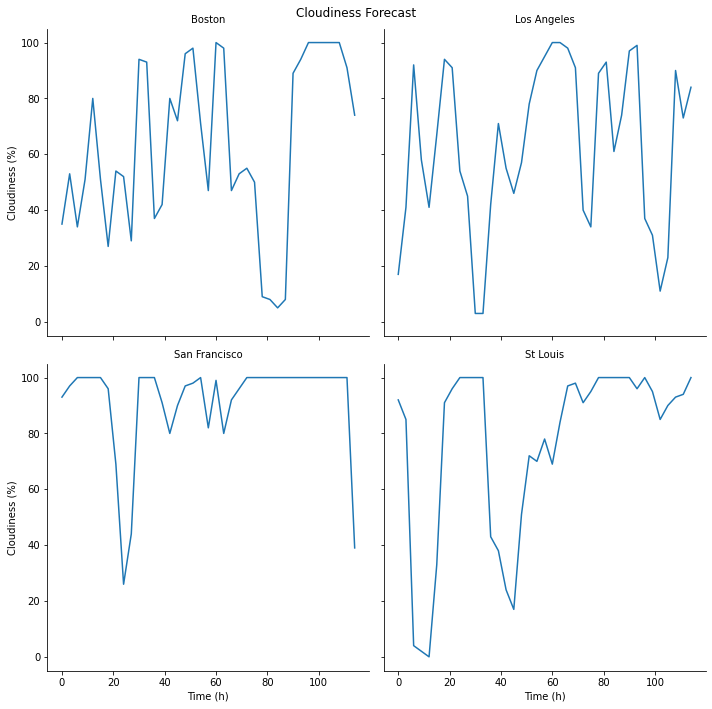

In [88]:
rel = sns.relplot(x = 'hours', y = 'cloudiness', data = final, col = 'name', kind = 'line', markers = True, col_wrap = 2)

rel.fig.subplots_adjust(top = 0.95)
rel.fig.suptitle('Cloudiness Forecast')
rel.set_titles('{col_name}')
rel.set(xlabel = 'Time (h)', ylabel = 'Cloudiness (%)')

plt.savefig('Cloudiness_forecast.png')
plt.show()

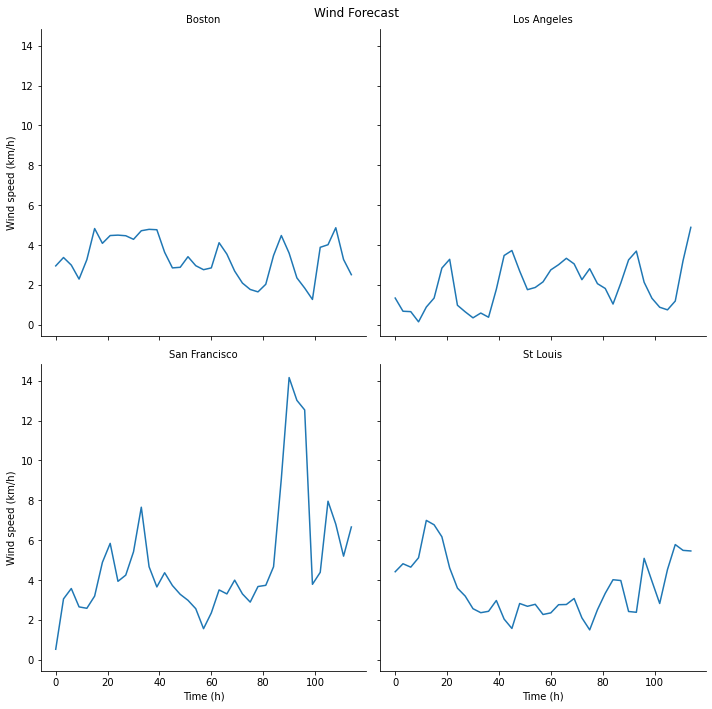

In [89]:
rel = sns.relplot(x = 'hours', y = 'wind', data = final, col = 'name', kind = 'line', markers = True, col_wrap = 2)

rel.fig.subplots_adjust(top = 0.95)
rel.fig.suptitle('Wind Forecast')
rel.set_titles('{col_name}')
rel.set(xlabel = 'Time (h)', ylabel = 'Wind speed (km/h)')

plt.savefig('Wind_forecast.png')
plt.show()

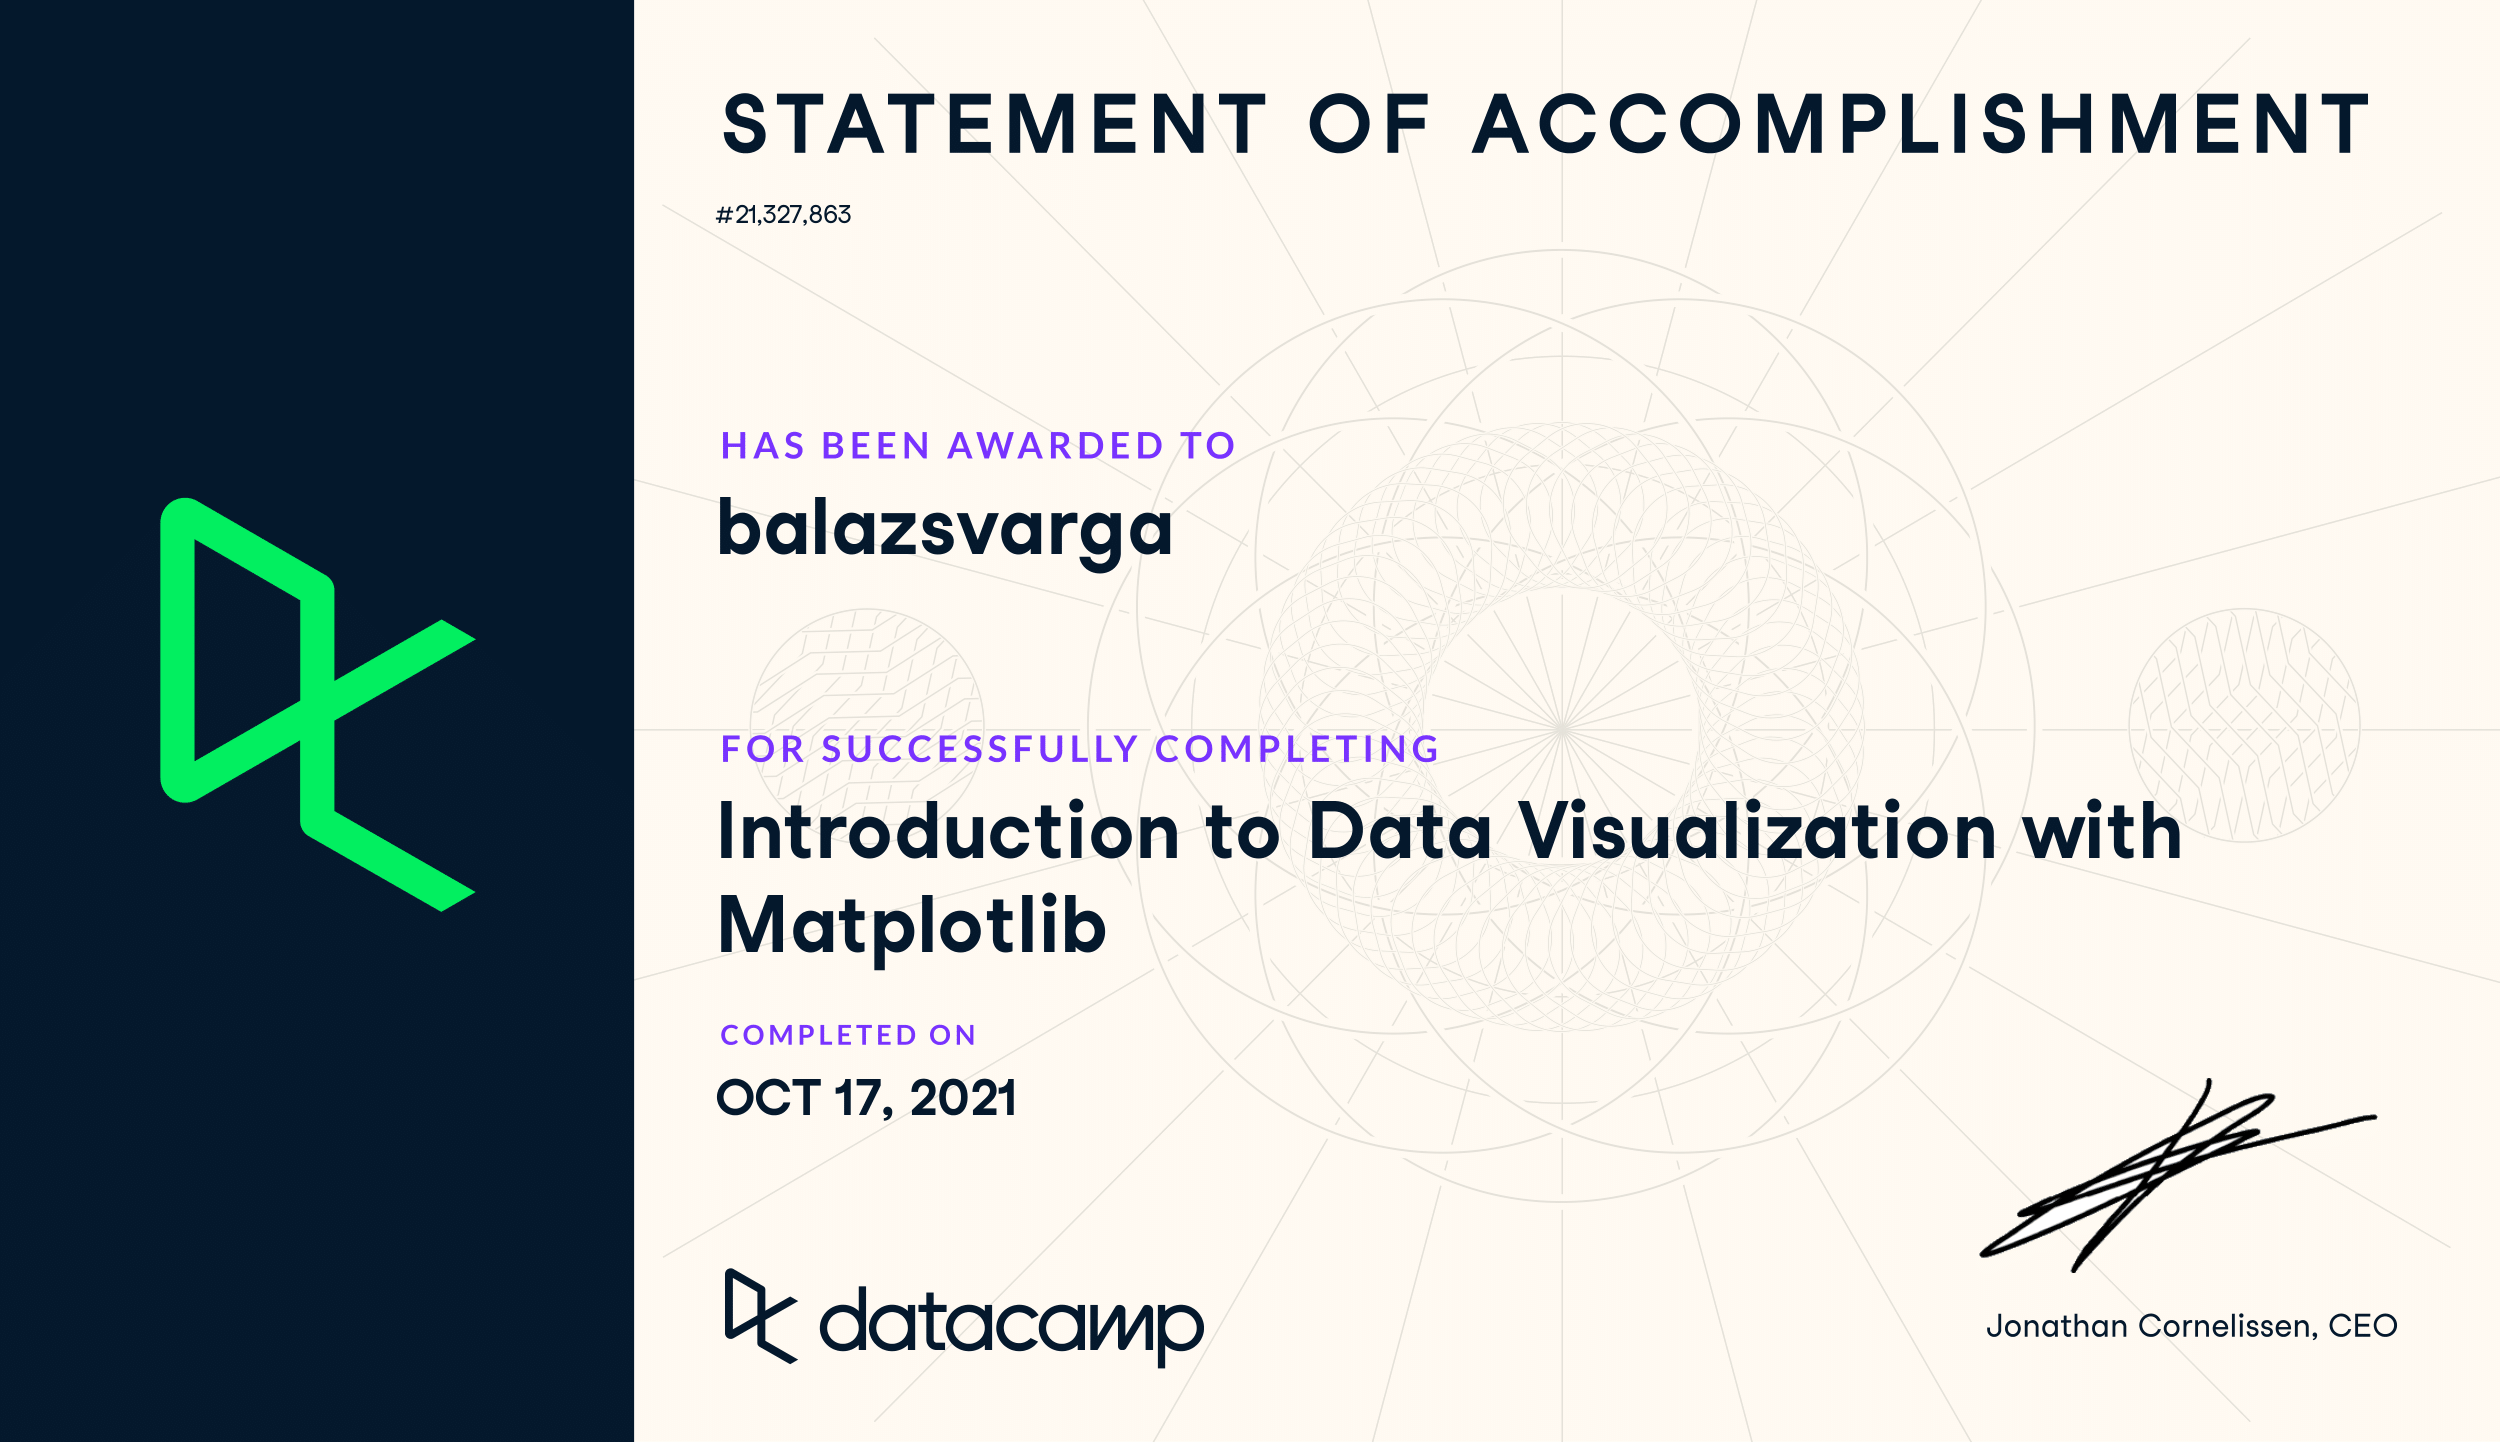

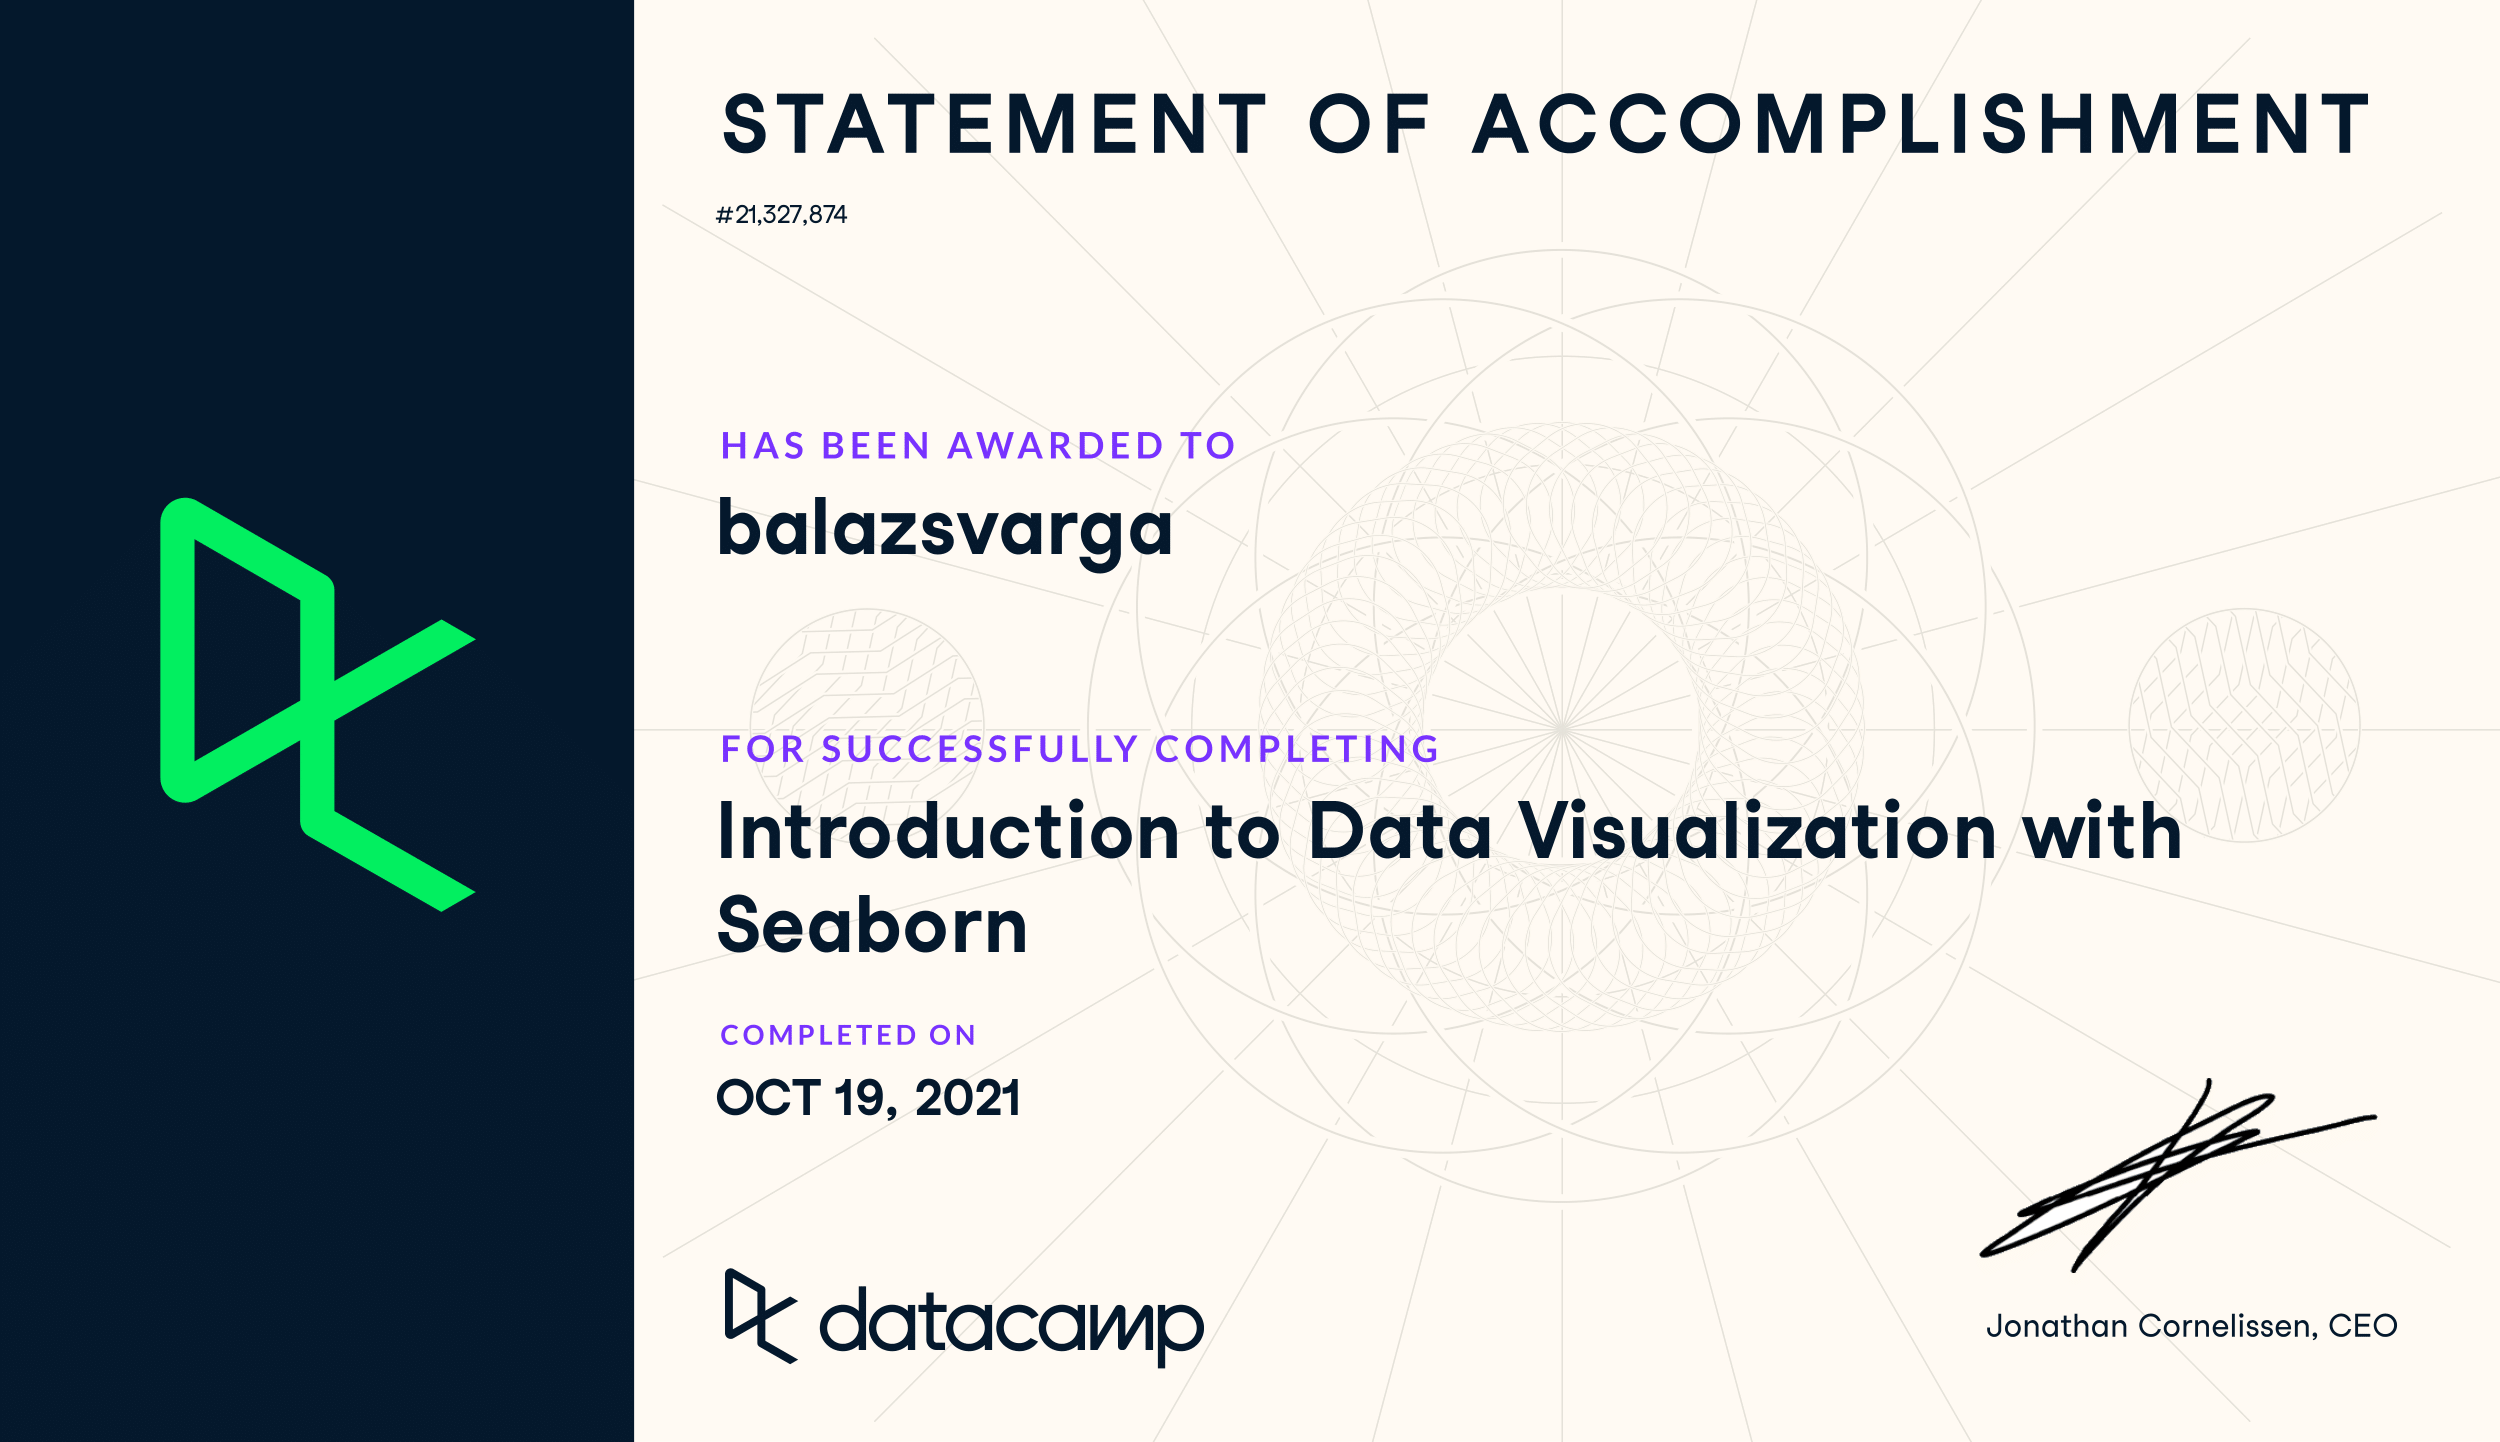